## 3.1 Gene counts based expression analysis

Read counts summary - inspect the uncounted reads
#### How many reads were not counted towards individual genes?

In [6]:
%%bash
cd /mnt/c/Users/Jerry/Downloads/
tail ./htseq_out/SRR5454079_gtf_genecounts_v11_s-reverse.txt

ENSG00000285990	0
ENSG00000285991	0
ENSG00000285992	0
ENSG00000285993	0
ENSG00000285994	5
__no_feature	3149550
__ambiguous	395230
__too_low_aQual	0
__not_aligned	833738
__alignment_not_unique	7502708


#### How many reads to start with?
Find out the number of pre-mapping reads, the number of reads mapped and number of secondary alignments

In [4]:
%%bash
cd /mnt/c/Users/Jerry/Downloads/
samtools flagstat ./hisat_out/SRR5454079.bam

24142929 + 0 in total (QC-passed reads + QC-failed reads)
5443891 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
23309191 + 0 mapped (96.55% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


#### Questions - write the answer below each question.

__I) What are the components of a FASTQ file?__

- Line 1 begins with a '@' character and is followed by a sequence identifier and an optional description (like a FASTA title line).
- Line 2 is the raw sequence letters.
- Line 3 begins with a '+' character and is optionally followed by the same sequence identifier (and any description) again.
- Line 4 encodes the quality values for the sequence in Line 2, and must contain the same number of symbols as letters in the sequence.

__II) What is a SAM file?__

Sequence Alignement/Map (SAM) is a file format to store sequence information that aligned to reference sequence. It may also contain sequence quality information.

__III) Why is it not possible to run htseq-count directly on FASTQ files? What is the missing step?__

htseq-count is used to count gene reads. It can't be applied to FASTQ files directly because raw FASTQ files are not aligned to reference sequence.
Missing step: Align FASTQ file to reference sequence and generate SAM file. Then apply htseq-count on SAM file.

__IV) Find one example of an optional SAM tag and explain why it might be useful.__

Predefined tags have been specified for storing information about the read or alignment. Examples of things stored in predefined tags:

Previous settings for various fields if they have been updated due to additional processing
Mappings from the alignment to Header values, used to match to a read group or program.
Additional information which may already be in the header like library and platform.
A user can also use any additional tags to store any information they want. TAGs starting with X, Y, or Z are reserved to be user defined.

Example:
XT:A:U  - user defined tag called XT.  It holds a character.  The value associated with this tag is 'U'.
NM:i:2  - predefined tag NM means: Edit distance to the reference (number of changes necessary to make this equal the reference, excluding clipping)

__V) You practiced the steps from FASTQ to BAM but is it possible to go from BAM to FASTQ? If so, how?__

It's possible to go from BAM to FASTQ:
- shuffle the reads in BAM:
    ```
    htscmd bamshuf -uOn 128 aln_reads.bam tmp > shuffled_reads.bam 
    ```
- revert BAM to FASTQ
    ```
    htscmd bam2fq -a shuffled_reads.bam > interleaved_reads.fq 
    ```
- compress fastq
    ```
    gzip interleaved_reads.fq
    ```
https://gatkforums.broadinstitute.org/gatk/discussion/2908/howto-revert-a-bam-file-to-fastq-format

__VI) Describe the process of a spliced alignment and explain why it is more difficult than mapping genomic DNA reads.__

1. Difficulties:
    Some reads will span two different axons. Need long read to reliablt map two exons.
2. Process:
    In practice, use a splice-ware aligner such as GSNAP, GSTRUCT, ReadsMap, STAR and TopHat2 .
    From algorithm aspect, spliced alignment uses dynamic programming to find most possible extron-extron mapping.    
    

__VII) Using the default settings of htseq-count, would a read which mapped fully to a genomic region on which 2 genes overlap be counted towards any of the 2 genes? Explain why.__

No it will be assigned as ambiguous.
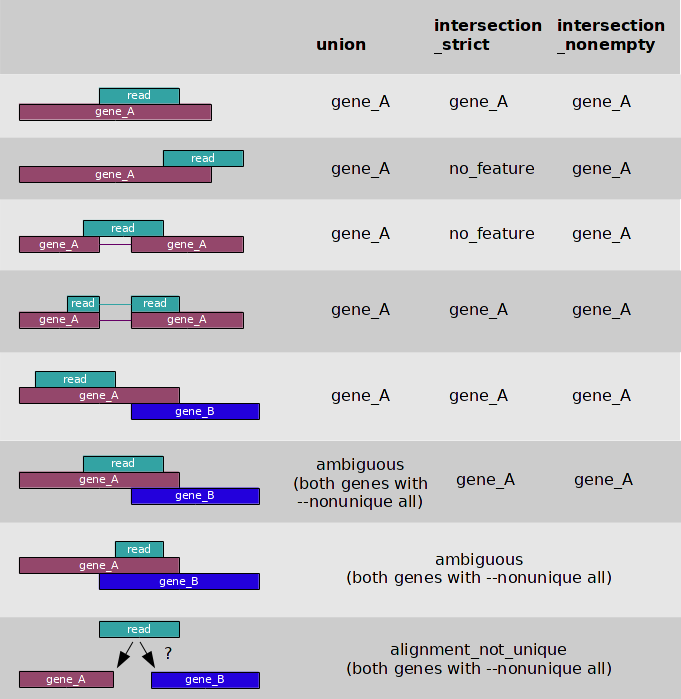

__VIII) You are interested in RNA-sequencing an organism for which no transcriptome annotations are available. Can you still use htseq-count to examine gene expression? If so, what upstream analyses would you perform first?__

No. Need to generate genome annotations first by genome annotation tools.

__IX) Intron retention can result in mRNA isoforms that contain unspliced introns. If **sample 1** contains a high frequency of intron-retained isoforms of gene A whereas **sample 2** contains fully spliced isoforms of gene A, but each sample has the identical number of reads mapping to gene A, which sample will have a higher gene A count using default htseq-count settings?__

First sample will have a higher gene A count since the intron retained reads would be assigned to gene A by default.